## Group Members:
1. Nipun Gupta (2021fc04426)
2. Aiswarya S Parvathi (2021fc04430)
3. Vengadesh S (2021fc04424)

# 1. Problem Statement
 
1. What is the problem that you are trying to solve?
   
   **Answer**: The problem is regarding **Fraud detection** on credit card transactions.
   
   
2. What kind of prediction (classification / regression) task are you performing?

   **Answer**: This is a binary classification task. We have to predict if a transaction is genuine or fraudulent

### Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# Installing opendatasets library to download the dataset
!pip install opendatasets

In [4]:
import opendatasets as od

# 2. Data Acquisition

## 2.1 Download the data directly

The dataset has been downloaded from Kaggle website : **https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset**.

In [5]:
# Path to the dataset on kaggle website
dataset = r"https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset"

In [6]:
# Downloading the dataset
od.download(dataset)
#{"username":"nipungupta26","key":"b74150bcb6b0c11a90bd22630992ac26"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  nipungupta26


Your Kaggle Key:

  ································


100%|██████████| 202M/202M [00:21<00:00, 9.81MB/s] 


The training and the testing datasets have been downloaded

## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [7]:
# Directory of the downloaded datasets in local system
data_dir = r'fraud-transactions-dataset'

In [8]:
# Listing out the datasets
os.listdir(data_dir)

['fraudTest.csv', 'fraudTrain.csv']

In [9]:
file_train = r'fraud-transactions-dataset/fraudTrain.csv'

In [10]:
file_train

'fraud-transactions-dataset/fraudTrain.csv'

Reading the dataset using pandas

In [11]:
df_fraudTrain = pd.read_csv(file_train, index_col=0)

In [12]:
df_fraudTrain.shape

(1296675, 22)

In [13]:
file_test = r'fraud-transactions-dataset/fraudTest.csv'

In [14]:
file_test

'fraud-transactions-dataset/fraudTest.csv'

In [15]:
df_fraudTest = pd.read_csv(file_test, index_col=0)

In [16]:
df_fraudTest.shape

(555719, 22)

## 2.3 Observations from the training dataframe

In [17]:
df_fraudTrain.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### Shape of the dataframe

In [18]:
df_fraudTrain.shape

(1296675, 22)

The dataframe consists of **1296675** rows and **22** columns

#### Description of the attributes of the dataframe

trans_date_trans_time: The date and time of the transaction.

cc_num: credit card number.

merchant: Merchant who was getting paid.

category: In what area does that merchant deal.

amt: Amount of money in American Dollars.

first: first name of the card holder.

last: last name of the card holder.

gender: Gender of the cardholder.Just male and female!

street:Street of card holder residence

city:city of card holder residence

state:state of card holder residence

zip:ZIP code of card holder residence

lat:latitude of card holder

long:longitude of card holder

city_pop:Population of the city

job:trade of the card holder

dob:Date of birth of the card holder

trans_num: Transaction ID

unix_time: Unix time which is the time calculated since 1970 to today.

merch_lat: latitude of the merchant

merch_long:longitude of the merchant

is_fraud: Whether the transaction is fraud(1) or not(0)

In [19]:
df_fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

### 3. Data Preparation

#### 3.1 Apply techniques

#### Dropping irrelevant features

Based on domain knowledge, the attributes that will not be useful for fraud detection are :

 - trans_date_trans_time
 - cc_num
 - first
 - last
 - street
 - dob
 - zip
 - lat
 - long
 - trans_num
 - unix_time
 - merchant
 - city
 - job
 
 These attributes can be dropped 

In [20]:
df_fraudTrain = df_fraudTrain.drop(columns=["trans_date_trans_time", "cc_num", "first", "last", "street", "dob", "zip", "lat", "long", "trans_num", "unix_time", "merchant", "city", "job", "state"], axis=1)

In [21]:
df_fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   city_pop    1296675 non-null  int64  
 4   merch_lat   1296675 non-null  float64
 5   merch_long  1296675 non-null  float64
 6   is_fraud    1296675 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 79.1+ MB


It can be observed that the irrelevant features have been dropped

#### Checking for duplicate rows

In [22]:
df_fraudTrain.duplicated().sum()

0

There are no duplicate rows in the dataframe

In [23]:
print("Value count for feature is_fraud")
print(df_fraudTrain['is_fraud'].value_counts())

Value count for feature is_fraud
0    1289169
1       7506
Name: is_fraud, dtype: int64


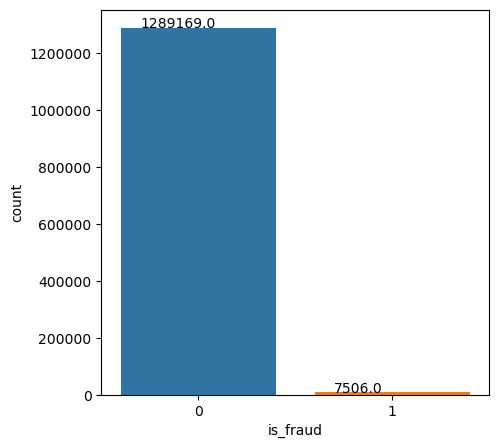

In [24]:
plt.figure(figsize=(5,5))
plt.ticklabel_format(style='plain')
ax = sns.countplot(x= 'is_fraud', data=df_fraudTrain)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

It can be observe that the dataframe is highly imbalanced. There are **1289169** counts of genuine transactions whereas **7506** counts for fraud transactions. The dataset will need to be balanced

In [25]:
print("Value count for feature gender")
print(df_fraudTrain['gender'].value_counts())

Value count for feature gender
F    709863
M    586812
Name: gender, dtype: int64


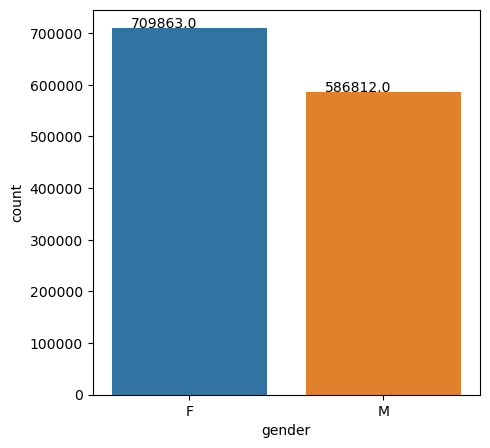

In [26]:
plt.figure(figsize=(5,5))
plt.ticklabel_format(style='plain')
ax = sns.countplot(x='gender', data=df_fraudTrain)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

It can be observed that there are **709863** females whereas **586812** males:

Now we will clean the training dataset

Checking if there is any missing value in the dataset

In [27]:
df_fraudTrain.isnull().sum()

category      0
amt           0
gender        0
city_pop      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

It can be observed there are no missing values in the training dataset

In [28]:
df_fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  object 
 3   city_pop    1296675 non-null  int64  
 4   merch_lat   1296675 non-null  float64
 5   merch_long  1296675 non-null  float64
 6   is_fraud    1296675 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 79.1+ MB


It can be observed that there are **1296675** rows in the training dataset

#### Extracting the continuous features from the data

In [29]:
continuous_features = [feature for feature in df_fraudTrain.select_dtypes(np.number).columns if feature not in ['merch_lat', 'merch_long', 'is_fraud']]

In [30]:
continuous_features

['amt', 'city_pop']

#### Plotting Boxplots to identify Univariate outliers

In [31]:
def create_boxplots(dataset, feature_list, target):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.ticklabel_format(style='plain')
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        plt.ticklabel_format(style='plain')
        sns.boxplot(x=dataset[target], y=dataset[feature], data=dataset, hue=target, color='orange')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

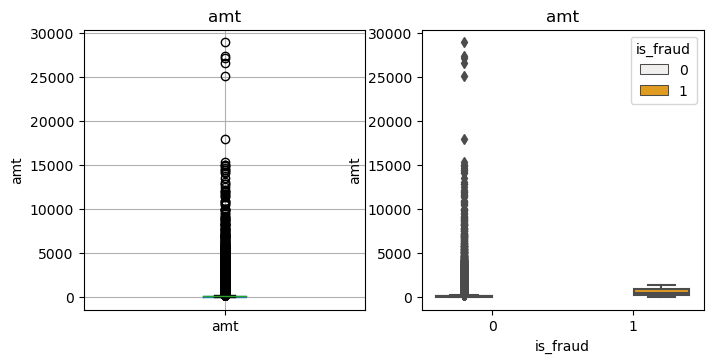

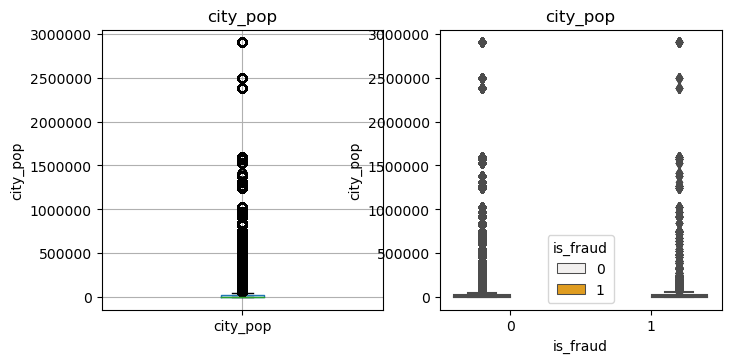

In [32]:
create_boxplots(df_fraudTrain, continuous_features, 'is_fraud')

From the boxplots, it can be observed that the above continuous features have univariate outliers

#### Plotting histograms and distplots to check the distributions of continuous variables

In [33]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.ticklabel_format(style='plain')
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.xlabel(feature)
        plt.show()

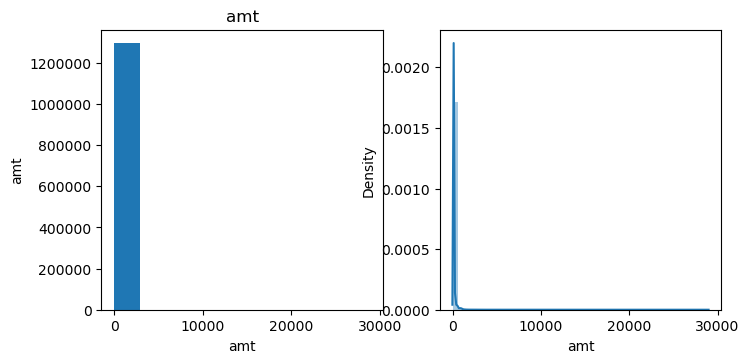

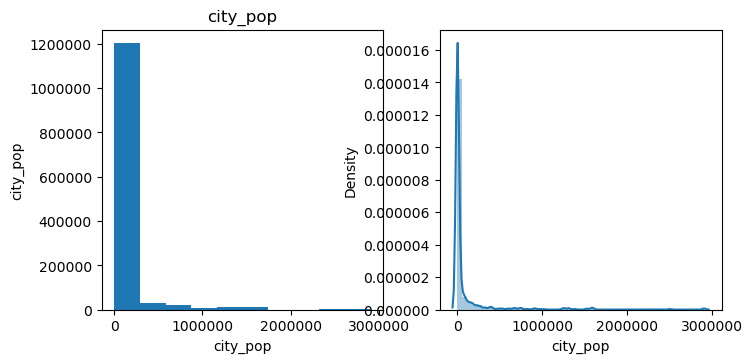

In [34]:
create_histograms_distplots(df_fraudTrain, continuous_features)

From the above histograms and distplots, it can be observed that the above continuous features have skewness

#### Plotting a Heatmap for correlation analysis

<AxesSubplot:>

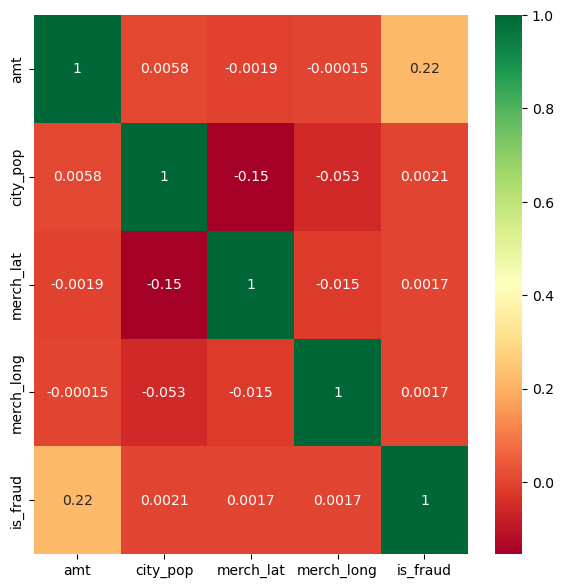

In [35]:
plt.figure(figsize=(7,7))
sns.heatmap(df_fraudTrain.corr(), annot=True, cmap="RdYlGn")

The correlation analysis using heatmap shows values of pearson correlation coefficient for the respective combinations of the features. The pearson correlation coefficient varies from -1 to 1. The stronger the negative value, the more inversely related are the features. The stronger the positive value, the stronger the direct relationship between the features. A value of zero means the features are independent of each other.

The correlation analysis will have effect on the feature selection. The combination of features which are strongly and directly related to each other need to be considered. One of such features can be dropped as all of such features will have the same impact on the target feature.

#### Creating Pivot table

In [36]:
pd.pivot_table(df_fraudTrain, index='is_fraud', values=['amt', 'city_pop', 'merch_lat', 'merch_long'], aggfunc=['median'])

median                               
              amt city_pop  merch_lat merch_long
is_fraud                                        
0          47.280     2456  39.365283 -87.440911
1         396.505     2623  39.427008 -86.813044

It can be observed that fraud transactions correspond to a much higher median **amt(amount)**. This implies that when the transaction amount is high, it is more likely for the transaction to be fraudulent

In [37]:
pd.pivot_table(df_fraudTrain, index='gender', values=['amt', 'city_pop', 'merch_lat', 'merch_long'], aggfunc='median')

,amt,city_pop,merch_lat,merch_long
gender,,,,
F,43.44,2303,39.142939,-88.546272
M,51.67,3032,39.631915,-86.574155


It can be observed that males correspond to a higher median **amt(transaction amount)** and comprise a higher **city_pop(city population)**. This implies that males spend more and there are more number of males in the considered geographical area

In [38]:
df_fraudTrain.groupby(['is_fraud', 'gender'])[['gender']].count().sort_values(['is_fraud']).rename(columns={'gender':'Count of males/females'})

Count of males/females
is_fraud gender                        
0        F                       706128
         M                       583041
1        F                         3735
         M                         3771

The above table shows the count of males/females for genuine and fraudulent transactions

<AxesSubplot:xlabel='is_fraud,gender'>

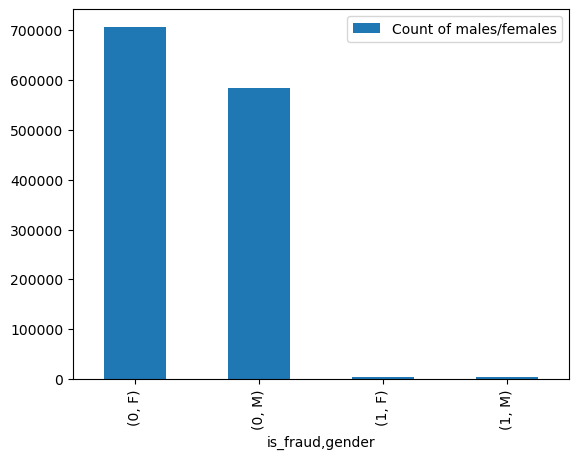

In [39]:
df_fraudTrain.groupby(['is_fraud', 'gender'])[['gender']].count().sort_values(['is_fraud']).rename(columns={'gender':'Count of males/females'}).plot(kind='bar')

The above bar chart shows that there is higher count of females than males for genuine transactions. For fraudulent transactions, the number of males and females are approximately the same

In [40]:
df_fraudTrain.head()

,category,amt,gender,city_pop,merch_lat,merch_long,is_fraud
0,misc_net,4.97,F,3495,36.011293,-82.048315,0
1,grocery_pos,107.23,F,149,49.159047,-118.186462,0
2,entertainment,220.11,M,4154,43.150704,-112.154481,0
3,gas_transport,45.00,M,1939,47.034331,-112.561071,0
4,misc_pos,41.96,M,99,38.674999,-78.632459,0


In [41]:
df_fraudTrain.groupby(['is_fraud', 'category'])[['category']].count().sort_values(['is_fraud']).rename(columns={'category':'Count of merchants'})

Count of merchants
is_fraud category                          
0        entertainment                93781
         shopping_pos                115829
         shopping_net                 95830
         personal_care                90538
         misc_pos                     79405
         misc_net                     62372
         kids_pets                   112796
         travel                       40391
         health_fitness               85746
         grocery_pos                 121895
         grocery_net                  45318
         gas_transport               131041
         food_dining                  91310
         home                        122917
1        shopping_net                  1713
         personal_care                  220
         misc_pos                       250
         misc_net                       915
         kids_pets                      239
         home                           198
         grocery_net                    134
         grocery_pos                   1743
         gas_transport                  618
         food_dining                    151
         entertainment                  233
         shopping_pos                   843
         health_fitness                 133
         travel                         116

<AxesSubplot:xlabel='is_fraud,category'>

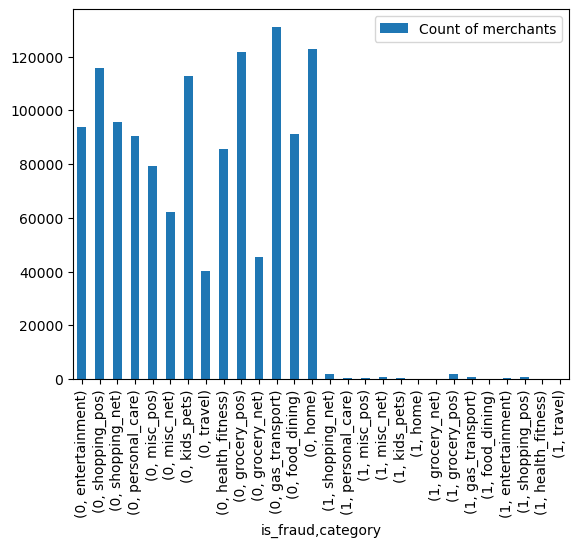

In [42]:
df_fraudTrain.groupby(['is_fraud', 'category'])[['category']].count().sort_values(['is_fraud']).rename(columns={'category':'Count of merchants'}).plot(kind='bar')

#### Handling the outliers

In [43]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [44]:
remove_outliers(df_fraudTrain, continuous_features)

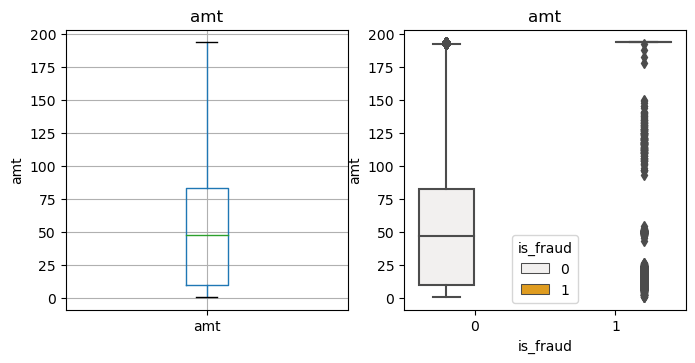

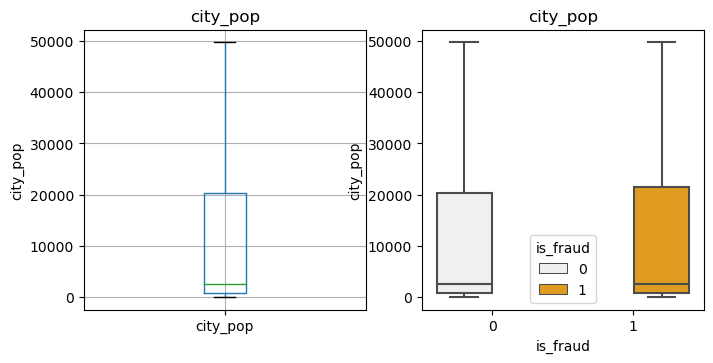

In [45]:
create_boxplots(df_fraudTrain, continuous_features, 'is_fraud')

The univariate outliers have been treated

### Checking for skewness

Skewness scores to determine skewness in the column

In [46]:
from scipy.stats import skew

In [47]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    for feature in feature_list:
        variables.append(feature)
        skew_scores.append(skew(dataset[feature]))
        skew_dict = {'Feature': variables, 'Skewness Score': skew_scores}
        skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [48]:
skewness_score(df_fraudTrain, continuous_features)

,Feature,Skewness Score
0,amt,1.061962
1,city_pop,1.188108


From the distplots and skewness scores, it can be observed that the feature columns **amt** and **city_pop** are considerably skewed. We will remove skewness by performing square root transformation

<AxesSubplot:xlabel='amt', ylabel='Density'>

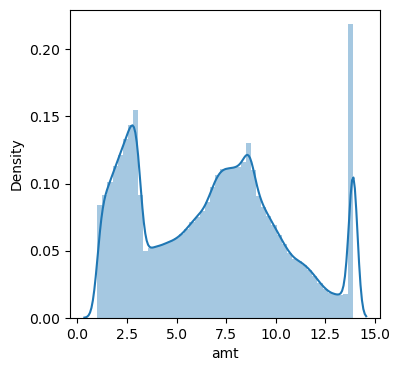

In [49]:
plt.figure(figsize=(4,4))
df_fraudTrain['amt'] = np.sqrt(df_fraudTrain['amt'])
sns.distplot(df_fraudTrain['amt'])

<AxesSubplot:xlabel='city_pop', ylabel='Density'>

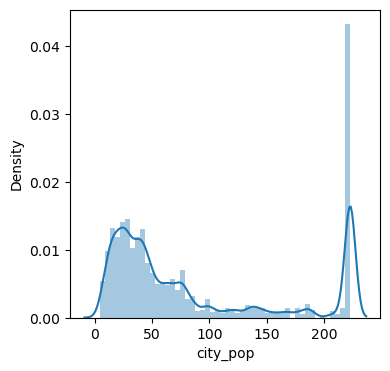

In [50]:
plt.figure(figsize=(4,4))
df_fraudTrain['city_pop'] = np.sqrt(df_fraudTrain['city_pop'])
sns.distplot(df_fraudTrain['city_pop'])

The skewness has been handled

#### Separating the independent and dependent features in the training dataset

In [51]:
X = df_fraudTrain.iloc[:,:-1]

In [52]:
Y = df_fraudTrain.iloc[:,-1]

In [53]:
X.head()

,category,amt,gender,city_pop,merch_lat,merch_long
0,misc_net,2.229350,F,59.118525,36.011293,-82.048315
1,grocery_pos,10.355192,F,12.206556,49.159047,-118.186462
2,entertainment,13.905934,M,64.451532,43.150704,-112.154481
3,gas_transport,6.708204,M,44.034078,47.034331,-112.561071
4,misc_pos,6.477654,M,9.949874,38.674999,-78.632459


In [54]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

#### 3.2 Encode categorical data

In [55]:
categorical_features = [feature for feature in X.select_dtypes(np.object).columns]

In [56]:
categorical_features

['category', 'gender']

In [57]:
for col in categorical_features:
    print('Unique categories in the feature', col, ': ', X[col].nunique())

Unique categories in the feature category :  14
Unique categories in the feature gender :  2


It can be observed that there is no categorical features that has too many categories.

In [58]:
X = pd.get_dummies(X, drop_first=True)

In [59]:
X.head(10)

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2.229350,59.118525,36.011293,-82.048315,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,10.355192,12.206556,49.159047,-118.186462,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,13.905934,64.451532,43.150704,-112.154481,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6.708204,44.034078,47.034331,-112.561071,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,6.477654,9.949874,38.674999,-78.632459,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,9.727795,46.454279,40.653382,-76.152667,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,6.673829,51.874849,37.162705,-100.153370,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,8.464632,77.575769,38.948089,-78.540296,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8,2.066398,38.366652,40.351813,-79.958146,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,13.905934,222.947303,37.179198,-87.485381,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
X.columns

Index(['amt', 'city_pop', 'merch_lat', 'merch_long', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

#### Handling imbalance in the data

In [61]:
print(Y.value_counts())

0    1289169
1       7506
Name: is_fraud, dtype: int64


It can be observed that there is a huge imbalance in the target column **is_fraud** in the dataset

We will perform **oversampling** using **SMOTEtomek** technique

In [62]:
# Installing imblearn library
!pip install imblearn

In [63]:
# Importing SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [64]:
# Initializing SMOTE
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.9)

In [65]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [66]:
# Fitting the training data onto the pipeline
X_train, Y_train = pipeline.fit_resample(X, Y)

In [67]:
from collections import Counter

In [68]:
print("Number of classes after fit {}".format(Counter(Y_train)))

Number of classes after fit Counter({0: 1145927, 1: 1031335})


Joining **X_train** and **Y_train** dataframes

In [69]:
df_train = X_train.join(Y_train, how='inner')

In [70]:
print("Value count for feature is_fraud")
print(df_train['is_fraud'].value_counts())

Value count for feature is_fraud
0    1145927
1    1031335
Name: is_fraud, dtype: int64


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

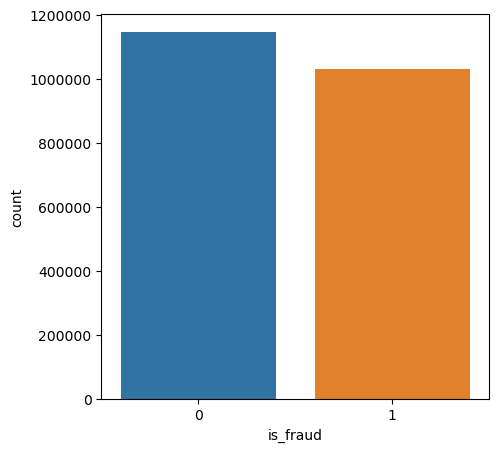

In [71]:
plt.figure(figsize=(5,5))
plt.ticklabel_format(style='plain')
sns.countplot(x='is_fraud', data=df_train)

It can be observed that the dataset is quite balanced now

In [72]:
df_train.columns

Index(['amt', 'city_pop', 'merch_lat', 'merch_long', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'is_fraud'],
      dtype='object')

#### 3.3 Feature Engineering

Feature Selection is performed to retain only the important features and discard the irrelevant features

In [73]:
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, RFE
from sklearn.linear_model import Lasso, LogisticRegression

In [74]:
X = df_train.iloc[:,:-1]

In [75]:
Y = df_train.iloc[:,-1]

In [76]:
bestfeatures = SelectKBest(score_func = chi2)

For fitting the data on the feature selection algorithm, we need to consider non-negative values of the data. So we can use **abs(absolute)** function to obtain the absolute positive value

In [77]:
X['merch_long'] = abs(X['merch_long'])

In [78]:
X['merch_lat'] = abs(X['merch_lat'])

In [79]:
fit = bestfeatures.fit(X, Y)

In [80]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [81]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

In [82]:
featureScores.columns = ['Features', 'Score']

In [83]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

In [84]:
featureScores.sort_values(by='Score', ascending=False)

,Features,Score
0,amt,1502294.225
9,category_home,83014.039
10,category_kids_pets,69330.514
4,category_food_dining,59592.831
8,category_health_fitness,58825.767
13,category_personal_care,54268.480
12,category_misc_pos,43337.963
6,category_grocery_net,28392.723
16,category_travel,27625.337
5,category_gas_transport,25905.078


The features that have high scores are more correlated with the target variable.

#### Feature Importance

In [85]:
from sklearn.ensemble import ExtraTreesClassifier

In [86]:
model = ExtraTreesClassifier()

In [87]:
model.fit(X,Y)

ExtraTreesClassifier()

In [88]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

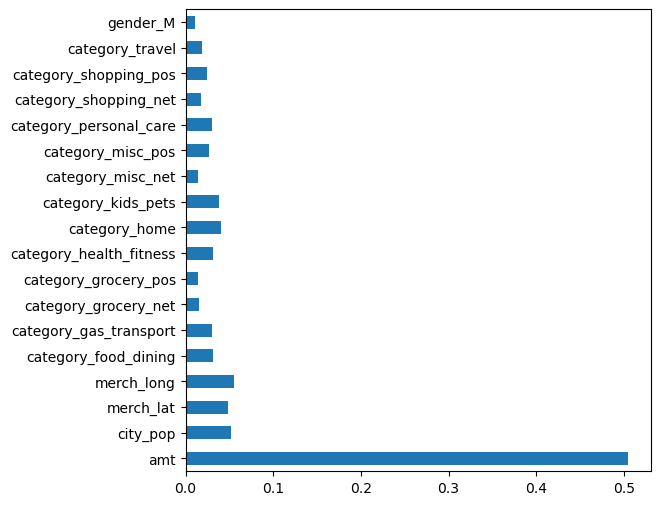

In [89]:
plt.figure(figsize=(6,6))
feat_importances.plot(kind='barh')
plt.show()

The above barplot displays the feature importance scores.

In [90]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [91]:
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [92]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True])

In [93]:
selected_feat = X.columns[(feature_sel_model.get_support())]

In [94]:
print(f'Total features : {X.shape[1]}')
print(f'Selected features : {len(selected_feat)}')

Total features : 18
Selected features : 16


In [95]:
selected_feat

Index(['amt', 'city_pop', 'merch_lat', 'merch_long', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_pos', 'gender_M'],
      dtype='object')

In [96]:
df_train.columns

Index(['amt', 'city_pop', 'merch_lat', 'merch_long', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M', 'is_fraud'],
      dtype='object')

In [97]:
clf_lr = LogisticRegression(random_state=1)

In [98]:
rfe = RFE(estimator=clf_lr, step=1)

In [99]:
fit = rfe.fit(X, Y)

In [100]:
print(f'Number of features : {fit.n_features_}')
print(f'Selected features : {fit.support_}')
print(f'Feature ranking : {fit.ranking_}')

Number of features : 9
Selected features : [False False False False  True  True  True False  True  True  True False
  True  True False False  True False]
Feature ranking : [ 6  9  8 10  1  1  1  4  1  1  1  3  1  1  5  2  1  7]


#### 3.4 Normalize the data

In [101]:
df_train.head()

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,7.708,61.368,40.105,-79.164,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8.494,17.059,46.798,-95.795,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,8.003,222.947,29.202,-81.249,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,10.025,191.792,40.382,-83.970,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,13.906,38.884,38.696,-91.229,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [102]:
df_train.describe()

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
count,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000
mean,9.043,87.555,38.593,-90.072,0.040,0.074,0.020,0.114,0.037,0.053,0.050,0.046,0.036,0.040,0.102,0.065,0.017,0.451,0.474
std,4.600,77.652,5.144,14.021,0.195,0.261,0.140,0.318,0.188,0.224,0.217,0.210,0.187,0.197,0.302,0.247,0.130,0.498,0.499
min,1.000,4.796,19.028,-166.671,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.427,27.258,34.915,-96.792,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,9.129,50.229,39.405,-87.170,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,13.906,143.101,41.958,-80.079,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
max,13.906,222.947,67.510,-66.951,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


It can be observed that there is different in the scales of respective continuous features. So we need to perform feature scaling. We can use **MinMaxScaler** to perform Min max normalization

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
std_scaler = MinMaxScaler()

In [105]:
df_train_scaled = std_scaler.fit_transform(df_train)

In [106]:
df_train = pd.DataFrame(df_train_scaled, columns=df_train.columns)

In [107]:
df_train.head()

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,0.520,0.259,0.435,0.878,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.581,0.056,0.573,0.711,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,0.543,1.000,0.210,0.857,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,0.699,0.857,0.440,0.829,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,1.000,0.156,0.406,0.757,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [108]:
df_train.describe()

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
count,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000,2177262.000
mean,0.623,0.379,0.404,0.768,0.040,0.074,0.020,0.114,0.037,0.053,0.050,0.046,0.036,0.040,0.102,0.065,0.017,0.451,0.474
std,0.356,0.356,0.106,0.141,0.195,0.261,0.140,0.318,0.188,0.224,0.217,0.210,0.187,0.197,0.302,0.247,0.130,0.498,0.499
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.266,0.103,0.328,0.701,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.630,0.208,0.420,0.797,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.634,0.473,0.868,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


It can be observed that the features have been scaled in the training dataset

Performing feature engineering on the test dataset

In [109]:
df_fraudTest.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.860,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.966,-80.936,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986,-81.201,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.840,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.321,-110.436,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450,-109.960,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.280,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.673,-73.537,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.496,-74.196,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.050,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.570,-80.819,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812,-80.883,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.190,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.253,-85.017,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959,-85.885,0


In [110]:
df_fraudTest = df_fraudTest.drop(columns=["trans_date_trans_time", "cc_num", "first", "last", "street", "dob", "zip", "lat", "long", "trans_num", "unix_time", "merchant", "city", "job", "state"], axis=1)

In [111]:
df_fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  object 
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  object 
 3   city_pop    555719 non-null  int64  
 4   merch_lat   555719 non-null  float64
 5   merch_long  555719 non-null  float64
 6   is_fraud    555719 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 33.9+ MB


Checking if there are any missing values in the test dataset

In [112]:
df_fraudTest.isnull().sum()

category      0
amt           0
gender        0
city_pop      0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [113]:
df_fraudTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   category    555719 non-null  object 
 1   amt         555719 non-null  float64
 2   gender      555719 non-null  object 
 3   city_pop    555719 non-null  int64  
 4   merch_lat   555719 non-null  float64
 5   merch_long  555719 non-null  float64
 6   is_fraud    555719 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 33.9+ MB


In [114]:
remove_outliers(df_fraudTest, continuous_features)

In [115]:
skewness_score(df_fraudTest, continuous_features)

,Feature,Skewness Score
0,amt,1.059
1,city_pop,1.183


<AxesSubplot:xlabel='amt', ylabel='Density'>

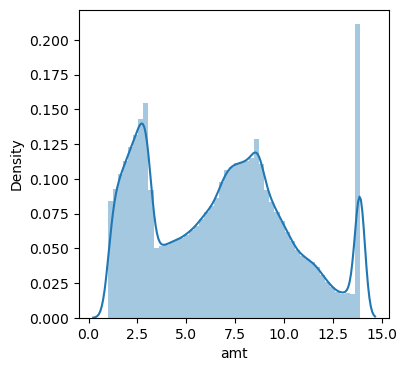

In [116]:
plt.figure(figsize=(4,4))
df_fraudTest['amt'] = np.sqrt(df_fraudTest['amt'])
sns.distplot(df_fraudTest['amt'])

<AxesSubplot:xlabel='city_pop', ylabel='Density'>

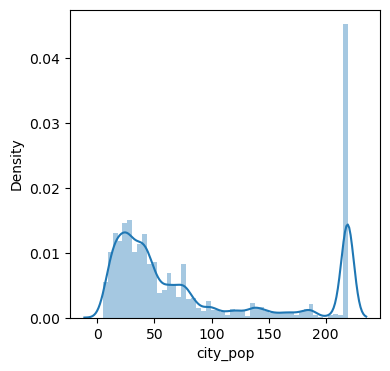

In [117]:
plt.figure(figsize=(4,4))
df_fraudTest['city_pop'] = np.sqrt(df_fraudTest['city_pop'])
sns.distplot(df_fraudTest['city_pop'])

In [118]:
skewness_score(df_fraudTest, continuous_features)

,Feature,Skewness Score
0,amt,0.238
1,city_pop,0.883


#### Encoding of categorical variables in the testing dataset

In [119]:
categorical_features = [feature for feature in df_fraudTest.select_dtypes(np.object).columns]

In [120]:
categorical_features

['category', 'gender']

In [121]:
for col in categorical_features:
    print('Unique categories in the feature', col, ': ', df_fraudTest[col].nunique())

Unique categories in the feature category :  14
Unique categories in the feature gender :  2


In [123]:
df_test = pd.get_dummies(df_fraudTest, drop_first=True)

In [124]:
df_test.head()

,amt,city_pop,merch_lat,merch_long,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,1.691,219.319,33.986,-81.201,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,5.463,17.378,39.450,-109.960,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,6.425,185.731,40.496,-74.196,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,7.749,219.319,28.812,-80.883,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1.786,33.556,44.959,-85.885,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


#### Feature Selection and Feature scaling in the testing dataset

In [125]:
df_test.describe()

,amt,city_pop,merch_lat,merch_long,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
count,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000
mean,6.686,85.946,38.543,-90.231,0.004,0.071,0.101,0.035,0.095,0.066,0.094,0.088,0.049,0.062,0.071,0.075,0.090,0.031,0.451
std,3.593,76.187,5.096,13.733,0.062,0.256,0.302,0.184,0.293,0.248,0.292,0.283,0.216,0.242,0.256,0.264,0.286,0.174,0.498
min,1.000,4.796,19.027,-166.672,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.103,27.221,34.755,-96.905,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,6.877,49.071,39.377,-87.445,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,9.111,140.303,41.954,-80.265,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,13.895,219.319,66.679,-66.952,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [126]:
X = df_test.drop(columns=["is_fraud"], axis=1)
Y = df_test.is_fraud

In [127]:
df_test = X.join(Y, how='inner')

In [128]:
df_test_scaled = std_scaler.transform(df_test)

In [129]:
df_test = pd.DataFrame(df_test_scaled, columns=df_test.columns)

In [130]:
df_test.head()

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
0,0.054,0.983,0.309,0.857,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
1,0.346,0.058,0.421,0.569,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
2,0.420,0.829,0.443,0.927,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.523,0.983,0.202,0.860,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
4,0.061,0.132,0.535,0.810,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000


In [131]:
df_test.describe()

,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,is_fraud
count,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000,555719.000
mean,0.441,0.372,0.403,0.767,0.071,0.101,0.035,0.095,0.066,0.094,0.088,0.049,0.062,0.071,0.075,0.090,0.031,0.451,0.004
std,0.278,0.349,0.105,0.138,0.256,0.302,0.184,0.293,0.248,0.292,0.283,0.216,0.242,0.256,0.264,0.286,0.174,0.498,0.062
min,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.163,0.103,0.324,0.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.455,0.203,0.420,0.794,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.628,0.621,0.473,0.866,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
max,0.999,0.983,0.983,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


The training and the test dataframes are ready for model training and testing purpose

### 3.5 Identify the target variables.

* Separating the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

In [132]:
X_train = df_train.drop(columns=["is_fraud"], axis=1)
Y_train = df_train.is_fraud

In [133]:
X_test = df_test.drop(columns=["is_fraud"], axis=1)
Y_test = df_test.is_fraud

## 3.6 Report

* Duplicate data was not present  in the dataset

* There was no missing data in the dataset

* Skewness and outliers were handled. For skewness, we used **square root transformation**. The data was moderately skewed due to which this technique was used.

* The categorical columns were encoded because the Machine Learning/Deep Learning algorithms work better with numbers than with object types. We implemented one hot encoding to encode the categorical features because the categorical columns were nominal and not ordinal

* the normalization technique used was MinMaxNormalization as it scales down the continuous features between 0 and 1

# 4. Deep Neural Network Architecture

#### Importing the keras libraries and packages

In [134]:
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout

* Initiating the ANN. This will be an empty neural network when instantiated

In [135]:
model = Sequential()

## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [136]:
# Number of features
input_dim = X_train.shape[1]
input_dim

18

In [137]:
# Adding the input layer
model.add(layers.Dense(units=64, kernel_initializer = 'he_uniform', input_dim=input_dim, activation='relu'))
model.add(Dropout(0.2))

# Adding the first hidden layer
model.add(layers.Dense(units=32, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dropout(0.4))

# Adding the second hidden layer
model.add(layers.Dense(units=16, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dropout(0.4))

# Adding the third hidden layer
model.add(layers.Dense(units=8, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dropout(0.4))

# Adding the output layer
model.add(layers.Dense(units=1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

### Reason/Justification for choosing the number of layers, nodes, activation function

In the above code, **he_uniform** is a technique to intialize the weights of the ANN. This technique works well with **relu** activation function. The **relu** activation function prevents vanishing gradient problem. **sigmoid** activation function is helpful in binary classification

We have passed the **input dimensions** in the input layer

We are considering 64 neurons in the input layer, 32 neurons in the first hidden layer, 16 neurons in the second hidden layer and and 8 neurons in the third hidden layer.

The output layer will have 1 neuron because this is a binary classification problem

The number of hidden neurons should be between the size of the input layer and the size of the output layer. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

Here are some guidelines to know the number of hidden layers and neurons per each hidden layer in a classification problem:

Based on the data, draw an expected decision boundary to separate the classes.
Express the decision boundary as a set of lines. Note that the combination of such lines must yield to the decision boundary. The number of selected lines represents the number of hidden neurons in the first hidden layer. To connect the lines created by the previous layer, a new hidden layer is added each time you need to create connections among the lines in the previous hidden layer. The number of hidden neurons in each new hidden layer equals the number of connections to be made.

In [138]:
#Displaying the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

## 4.2 Report

* Number of layers: 5 layers

* Number of units in each layer: 

 - Input layer: 64 units
 - First layer: 16 units
 - Second layer: 8 units
 - Third layer: 4 units
 - Output layer: 1 unit

* Activation function used in each hidden layer: relu activation function

* Activation function used in the output layer: sigmoid activation

# 5. Training the model

## 5.1 Configure the training

Configure the model for training, by using appropriate optimizers and regularizations

In [139]:
# Compiling the ANN
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

We have selected the **adam** optimizer for backpropagation

Whenever the output is binary, then we can select **binary_crossentropy** for the loss

We have selected **accuracy** as the metrics

## 5.2 Train the model

In [140]:
# Fitting the ANN to the training set
classifier_nn = model.fit(X_train,Y_train,
                          validation_split = 0.15,
                          epochs=10,
                          verbose=True,
                          batch_size=256,
                          shuffle=True,
                          )

Epoch 1/10
7230/7230 [==============================] - 37s 4ms/step - loss: 0.2348 - accuracy: 0.9044 - val_loss: 0.1492 - val_accuracy: 0.9594
Epoch 2/10
7230/7230 [==============================] - 31s 4ms/step - loss: 0.1753 - accuracy: 0.9284 - val_loss: 0.1504 - val_accuracy: 0.9511
Epoch 3/10
7230/7230 [==============================] - 30s 4ms/step - loss: 0.1698 - accuracy: 0.9295 - val_loss: 0.1454 - val_accuracy: 0.9504
Epoch 4/10
7230/7230 [==============================] - 30s 4ms/step - loss: 0.1669 - accuracy: 0.9300 - val_loss: 0.1364 - val_accuracy: 0.9563
Epoch 5/10
7230/7230 [==============================] - 29s 4ms/step - loss: 0.1658 - accuracy: 0.9300 - val_loss: 0.1321 - val_accuracy: 0.9599
Epoch 6/10
7230/7230 [==============================] - 30s 4ms/step - loss: 0.1645 - accuracy: 0.9302 - val_loss: 0.1525 - val_accuracy: 0.9337
Epoch 7/10
7230/7230 [==============================] - 30s 4ms/step - loss: 0.1641 - accuracy: 0.9304 - val_loss: 0.1292 - val_ac

**batch_size** is used to specify the number of data points for computations in respective iterations so that less computation power is required

# 6. Test the model

In [141]:
# Predict Labels
Y_pred = model.predict(X_test)

for i in range(len(Y_pred)):
    if Y_pred[i]>0.5:
        Y_pred[i]=1
    elif Y_pred[i]<=0.5:
        Y_pred[i]=0

17367/17367 [==============================] - 27s 2ms/step


## 7.  Conclusion 

Plot the training and validation accuracy and loss report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

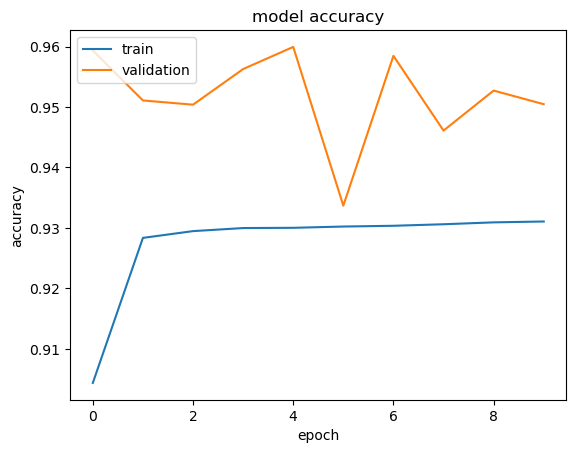

In [142]:
# summarize history for accuracy between training and validation

plt.plot(classifier_nn.history['accuracy'])
plt.plot(classifier_nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

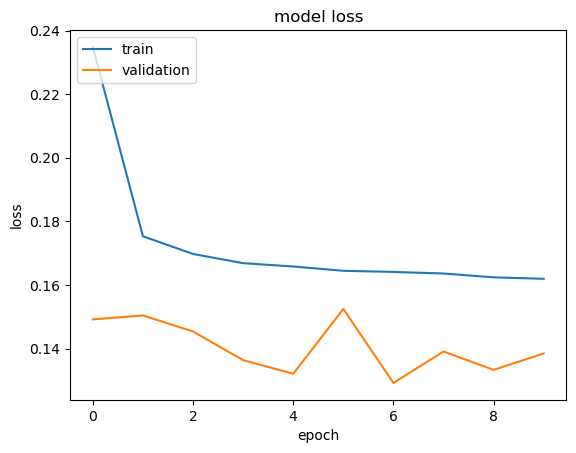

In [143]:
# summarize history for loss between training and validation

plt.plot(classifier_nn.history['loss'])
plt.plot(classifier_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

It can be observed that the training and the validation loss have reduced with increase in the epochs

#### Determining model accuracy

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
print("accuracy score : ", str(accuracy_score(Y_test, Y_pred)*100))

accuracy score :  94.98343587316612


The accuracy of the ANN model is good

<AxesSubplot:>

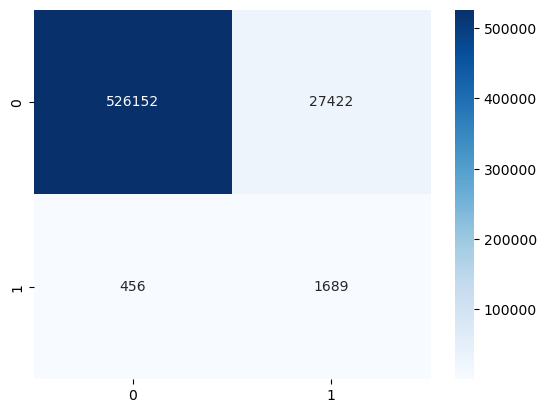

In [146]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot = True, cmap = 'Blues', fmt='g')

As per the confusion matrix, the false positives and false negatives are high

In [147]:
# Classification Report
print('Classfication report = \n', classification_report(Y_test, Y_pred))

Classfication report = 
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    553574
         1.0       0.06      0.79      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.87      0.54    555719
weighted avg       1.00      0.95      0.97    555719



The model performance metrics are poor and can be improved by Hyperparameter tuning

### Hyperparameter tuning

In [148]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization
from keras.activations import relu, sigmoid

We will perform **GridSearchCV** to select the suitable hyperaprameters.

We will create a function where we will initialize the Sequential model. We will provide the layers and the type of activations required as arguments to this function

In [149]:
def create_model(layers, activation):
    model_new = Sequential()
    # We will iterate through the layers and create the dense neurons
    for i, nodes in enumerate(layers):
        # For the input layer, we will provide the input dimension 
        if i==0:
            model_new.add(Dense(nodes, input_dim=X_train.shape[1]))
            model_new.add(Activation(activation))
            model_new.add(Dropout(0.5))
        else:
        # For the successive layers, we do not need to provide the input dimension
            model_new.add(Dense(nodes))
            model_new.add(Activation(activation))
            model_new.add(Dropout(0.5))
            
    # The output layer will have only 1 neuron
    model_new.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compiling the model
    model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model_new

**KerasClassifier** is the classifier that we will build. We will pass the **create_model** function to it as an argument

In [150]:
model_new_2 = KerasClassifier(build_fn=create_model, verbose=0)

In [151]:
# In the first iteration, there will be 1 hidden layer with 20 neurons

# In the second iteration, there will be 2 hidden layers with 40 and 20 neurons respectively

layers = [[20], [40, 20], [45, 30, 15]]

In [152]:
# The activation functions used for hyperparameter tuning are sigmoid and relu. For the first iteration, sigmoid will be used for the hidden layers
# for the second iteration, sigmoid will be used for the hidden layers
activations = ['sigmoid', 'relu']

In [153]:
# Preparing a dictionary of the hyperparameters
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs = [3])

In [154]:
# Building the GridSearchCV model
grid = GridSearchCV(estimator=model_new_2, param_grid=param_grid, cv=4, n_jobs=-1)

In [155]:
# Training the GridSearchCV
grid_result = grid.fit(X_train, Y_train)

### Model best results

In [157]:
print(grid_result.best_score_, grid_result.best_params_)

nan {'activation': 'sigmoid', 'batch_size': 128, 'epochs': 3, 'layers': [20]}


In [158]:
pred_y = grid.predict(X_test)

17367/17367 [==============================] - 27s 2ms/step


In [159]:
y_pred = (pred_y > 0.5)

<AxesSubplot:>

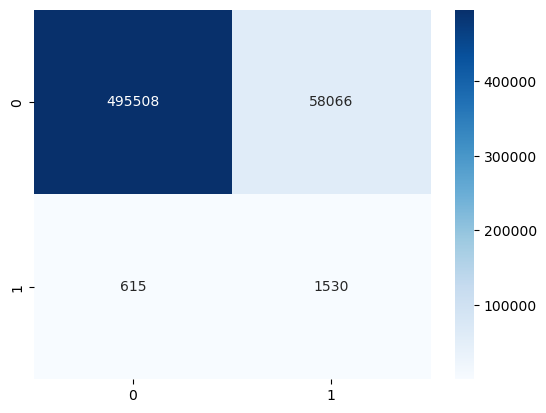

In [160]:
sns.heatmap(confusion_matrix(Y_test, y_pred), annot = True, cmap = 'Blues', fmt='g')

In [161]:
score = accuracy_score(Y_test, y_pred)

In [162]:
score

0.8944052659707514

In [163]:
print('Classfication report = \n', classification_report(Y_test, y_pred))

Classfication report = 
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.94    553574
         1.0       0.03      0.71      0.05      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.80      0.50    555719
weighted avg       1.00      0.89      0.94    555719



The above are the results of **Hyperparameter tuning**

# 8. Solution

We propose an ANN Deep Learning solution for the credit card fraud transaction detection problem scenario

Challenges faced :

 - Huge dataset
 - Tweaking the parameters